# Classification Challenge

The dataset here comes from a kaggle example on Kickstarter projects.  Your goal is the following:

- Load and explore the data
- Determine strategy for missing variables
- Build classifier to predict `state` column.  
- Compare and visualize the `ROC` curve for three different classifiers:
 - `LogisticRegression`
 - `KNeighborsClassifier`
 - `DecisionTreeClassifier`
 
- What did the `DecisionTreeClassifier` decide were the most important features?  Visualize the top five.
- Visualize a `DecisionTreeClassifier` with depth 3, and describe the results.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/ks-projects.csv.zip', encoding='Windows-1252', compression='zip')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [47]:
fail = []
for entry in df['state ']:
    if entry == 'successful':
        fail.append(1)
    else:
        fail.append(0)

In [48]:
fail[:10]

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]

In [49]:
df['success'] = fail

In [50]:
df.success.value_counts()

0    210669
1    113081
Name: success, dtype: int64

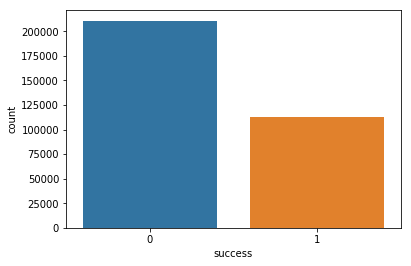

In [52]:
%matplotlib inline
import seaborn as sns
sns.countplot(df.success)

In [44]:
df['state '].value_counts()

failed                 168221
successful             113081
canceled                32354
live                     4428
undefined                3555
suspended                1479
0                          96
1                          15
25                         11
5                          11
10                         10
100                         8
50                          7
65                          6
35                          5
20                          5
110                         5
2                           5
55                          5
21                          4
6                           4
30                          4
390                         3
150                         3
125                         3
90                          3
130                         3
200                         3
45                          2
535                         2
                        ...  
1056                        1
3036                        1
5556      

In [53]:
df[(df['state '] == 'failed') | (df['state '] == 'successful') ].shape

(281302, 18)

In [54]:
df_stated = df[(df['state '] == 'failed') | (df['state '] == 'successful') ]

In [56]:
df_stated['state '].dropna().shape

(281302,)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
import numpy as np
df_stated = df_stated[df_stated['state '] != np.nan]

In [62]:
cats = pd.get_dummies(df_stated['main_category '])

In [65]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4), min_df = 5)
tfs = tfidf.fit_transform(df_stated['name '].dropna())

In [66]:
tfs_array = tfs.toarray()
df_2 = pd.DataFrame(tfs_array, columns=tfidf.get_feature_names())

In [67]:
df_2.head()

,00,000,000 000,000 feet,000 mile,000 miles,000 people,000 words,000 years,001,...,zoo,zookeeper,zoom,zoë,zu,zulu,zum,zur,ça,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
X = df_2
df_stated['usd pledged '].dtype

dtype('O')